<a href="https://colab.research.google.com/github/swiftiecoder/Digital-Humanities-Project/blob/main/experiments_pt_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

In [14]:
df = pd.read_excel('lyrics-dataset-updated-v2.xlsx')
df.rename(columns={'name': 'track'}, inplace=True)
df.head()

,edition,year,status,track,artist,lyrics,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,3rd,1960,Winner,Theme From Exodus,Ernest Gold,NaN,0.0846,0.265,9.0,-13.867,0.0,0.0345,0.797,0.410000,0.350,0.0617,68.219,892204.0,4.0
1,3rd,1960,Nominee,Theme From A Summer Place,Percy Faith,NaN,0.3260,0.326,0.0,-15.144,1.0,0.0297,0.591,0.918000,0.494,0.8700,186.232,142693.0,3.0
2,3rd,1960,Nominee,Second Time Around,Frank Sinatra,Love is lovelier the second time around\nJust ...,0.2530,0.193,0.0,-12.149,1.0,0.0309,0.908,0.000003,0.134,0.1660,90.249,180467.0,3.0
3,3rd,1960,Nominee,Nice 'n Easy,Frank Sinatra,Let's take it nice and easy\nIt's gonna be so ...,0.5360,0.148,0.0,-14.903,1.0,0.0310,0.773,0.000000,0.101,0.5090,109.292,165760.0,4.0
4,3rd,1960,Nominee,He'll Have To Go,Jim Reeves,Put your sweet lips a little closer to the pho...,0.5670,0.168,1.0,-16.451,1.0,0.0380,0.850,0.001060,0.109,0.1980,81.331,138373.0,3.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edition           355 non-null    object 
 1   year              355 non-null    int64  
 2   status            355 non-null    object 
 3   track             355 non-null    object 
 4   artist            355 non-null    object 
 5   lyrics            352 non-null    object 
 6   danceability      353 non-null    float64
 7   energy            353 non-null    float64
 8   key               353 non-null    float64
 9   loudness          353 non-null    float64
 10  mode              353 non-null    float64
 11  speechiness       353 non-null    float64
 12  acousticness      353 non-null    float64
 13  instrumentalness  353 non-null    float64
 14  liveness          353 non-null    float64
 15  valence           353 non-null    float64
 16  tempo             353 non-null    float64
 1

In [16]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 2 to 354
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edition           350 non-null    object 
 1   year              350 non-null    int64  
 2   status            350 non-null    object 
 3   track             350 non-null    object 
 4   artist            350 non-null    object 
 5   lyrics            350 non-null    object 
 6   danceability      350 non-null    float64
 7   energy            350 non-null    float64
 8   key               350 non-null    float64
 9   loudness          350 non-null    float64
 10  mode              350 non-null    float64
 11  speechiness       350 non-null    float64
 12  acousticness      350 non-null    float64
 13  instrumentalness  350 non-null    float64
 14  liveness          350 non-null    float64
 15  valence           350 non-null    float64
 16  tempo             350 non-null    float64
 17  du

# Context: Sentiment Analaysis and Word Cloud

In [17]:
df['decade'] = (df['year'] // 10) * 10
grouped_by_decade = df.groupby('decade')

<ipython-input-17-8653e8c48785>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'] = (df['year'] // 10) * 10


In [18]:
# first_decade = df[df['decade'] == df['decade'].min()]  # Filter for the first decade
# last_song_first_decade = first_decade.iloc[-2]  # Get the last entry

# # Display the last song in the first decade
# print(last_song_first_decade["lyrics"])

In [19]:
# for (decade, group) in grouped_by_decade:
#     # Combine all lyrics for the current decade into one string
#     all_lyrics = ' '.join(group['cleaned_lyrics'])
#     print(all_lyrics)
#     break

In [20]:
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [21]:
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
def preprocess_lyrics(lyrics):
    if pd.isna(lyrics):
      return ''

    # Replace newline characters with space and remove extra whitespace
    lyrics = re.sub(r'\s+', ' ', lyrics.replace('\n', ' ')).strip()

    # Convert to lowercase
    lyrics = lyrics.lower()

    # Remove punctuation
    lyrics = re.sub(r'[^\w\s\']', '', lyrics)

    # Tokenize the lyrics by splitting on whitespace
    tokens = lyrics.split()

    # Remove stopwords and lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word.strip()) for word in tokens if word.isalpha() and word not in stop_words]

    return ' '.join(tokens)

df['cleaned_lyrics'] = df['lyrics'].apply(preprocess_lyrics)

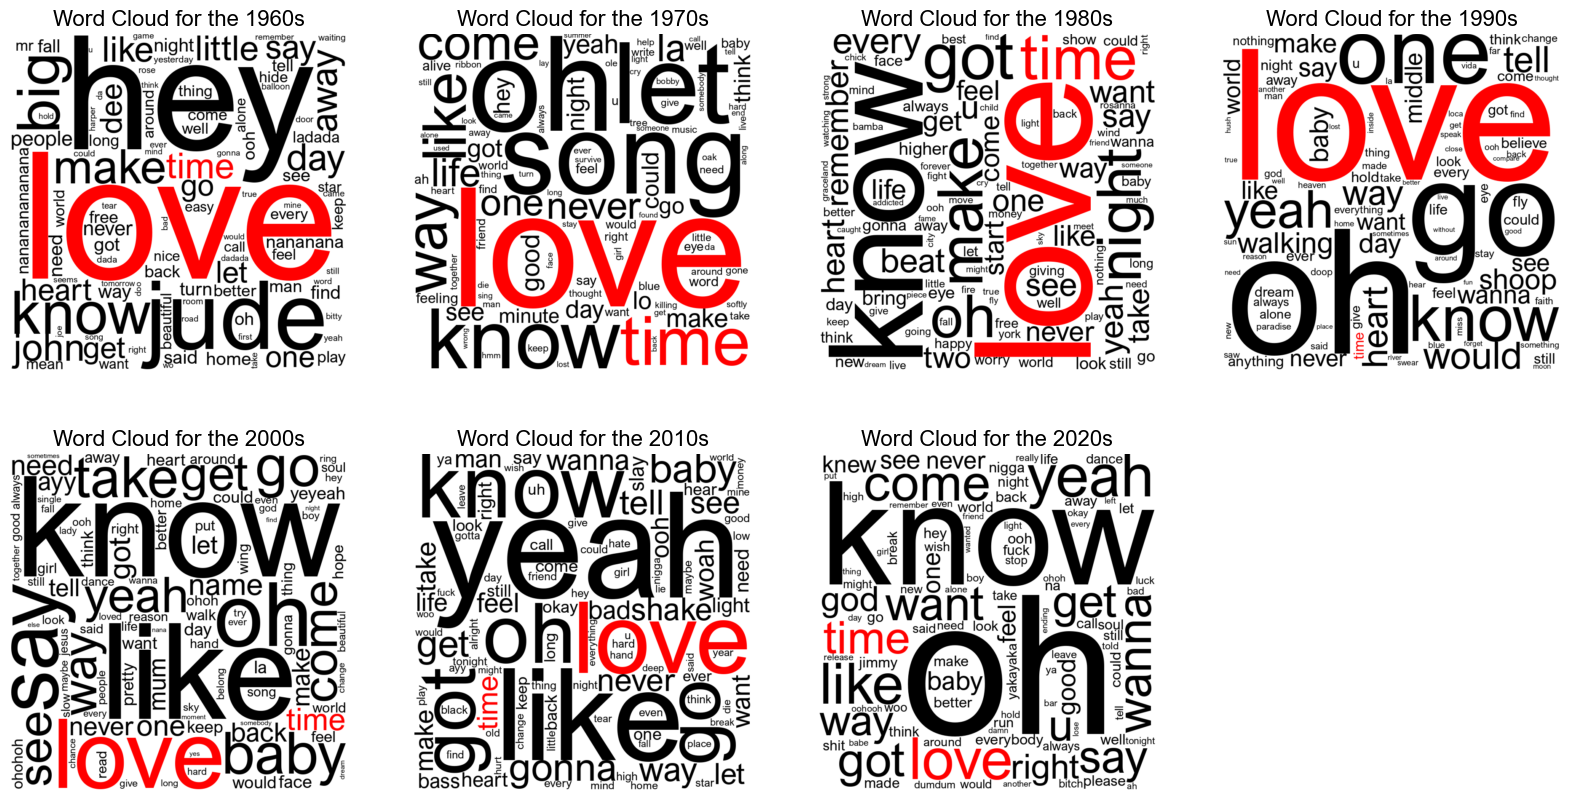

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import matplotlib.font_manager as fm

decades = [decade for decade, _ in grouped_by_decade]
num_decades = len(decades)

# Define rows and columns layout
cols = 4
rows = 2

# Create subplots with a 4x3 layout, adjusting figsize for display
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()  # Flatten the 2D array of axes

def color_func(word, *args, **kwargs):
    return "red" if word in ['love', 'time'] else "black"  # Default color is black

for ax, (decade, group) in zip(axes, grouped_by_decade):
    # Combine all lyrics for the current decade into one string
    all_lyrics = ' '.join(group['cleaned_lyrics'])

    # Create a WordCloud for the current decade
    wordcloud = WordCloud(
        width=800,
        height=800,
        background_color='white',
        max_words=100,
        font_path='Arial Nova.ttf',  # Set the font path here
        color_func=color_func,
    ).generate_from_frequencies(Counter([i.strip() for i in all_lyrics.lower().split()]))

    # Plot the WordCloud for the current decade
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for the {decade}s', fontproperties=fm.FontProperties(fname='Arial Nova.ttf'), fontsize=16)

# Hide any unused subplots
for i in range(num_decades, len(axes)):
    axes[i].axis('off')

# plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline

# Sample DataFrame
lyrics_df = df

# Initialize sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Define a function to get sentiment label
def get_sentiment_label(text):
    if pd.isnull(text):
        return "neutral"
    result = sentiment_analyzer(text[:512])[0]
    return result['label'].lower()

# Create a 'decade' column and calculate sentiment
lyrics_df['decade'] = (lyrics_df['year'] // 10) * 10
lyrics_df['sentiment'] = lyrics_df['lyrics'].apply(get_sentiment_label)

# Filter out neutral sentiment if present and count by sentiment and decade
sentiment_counts = (
    lyrics_df[lyrics_df['sentiment'] != 'neutral']
    .groupby(['decade', 'sentiment'])
    .size()
    .unstack(fill_value=0)
)

# Calculate the difference between positive and negative counts
sentiment_counts['difference'] = sentiment_counts['positive'] - sentiment_counts['negative']

model.safetensors:  39%|###9      | 105M/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

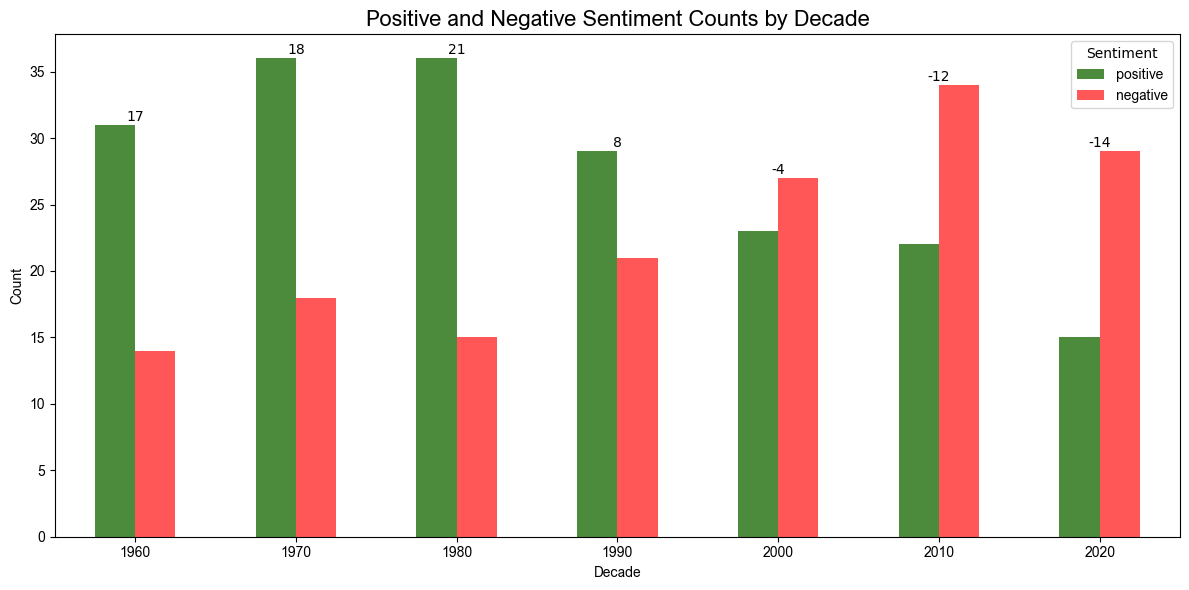

In [25]:
# Plot the counts of positive and negative sentiments by decade
ax = sentiment_counts[['positive', 'negative']].plot(kind='bar', stacked=False,
                                                      color = ['#4B8B3B', '#ff5757'],
                                                     figsize=(12, 6))

fontprop = fm.FontProperties(fname='Arial Nova.ttf')

plt.title('Positive and Negative Sentiment Counts by Decade', fontproperties=fontprop, fontsize=16)
plt.xlabel('Decade', fontproperties=fontprop)
plt.xticks(rotation=0, fontproperties=fontprop)
plt.yticks(rotation=0, fontproperties=fontprop)
plt.ylabel('Count', fontproperties=fontprop)
plt.legend(title='Sentiment', prop=fontprop)

# Annotate the difference on top of each bar
for i, (index, row) in enumerate(sentiment_counts.iterrows()):
    difference = row['difference']
    ax.annotate(f'{difference}',
                xy=(i, max(row['positive'], row['negative'])),  # position at the top of the stacked bar
                xytext=(0, 3),  # offset for readability
                textcoords="offset points",
                ha='center',
                fontsize=10,
                color='black')

plt.tight_layout()
plt.show()

In [27]:
sentiment_counts

sentiment,negative,positive,difference
decade,,,
1960,14,31,17
1970,18,36,18
1980,15,36,21
1990,21,29,8
2000,27,23,-4
2010,34,22,-12
2020,29,15,-14


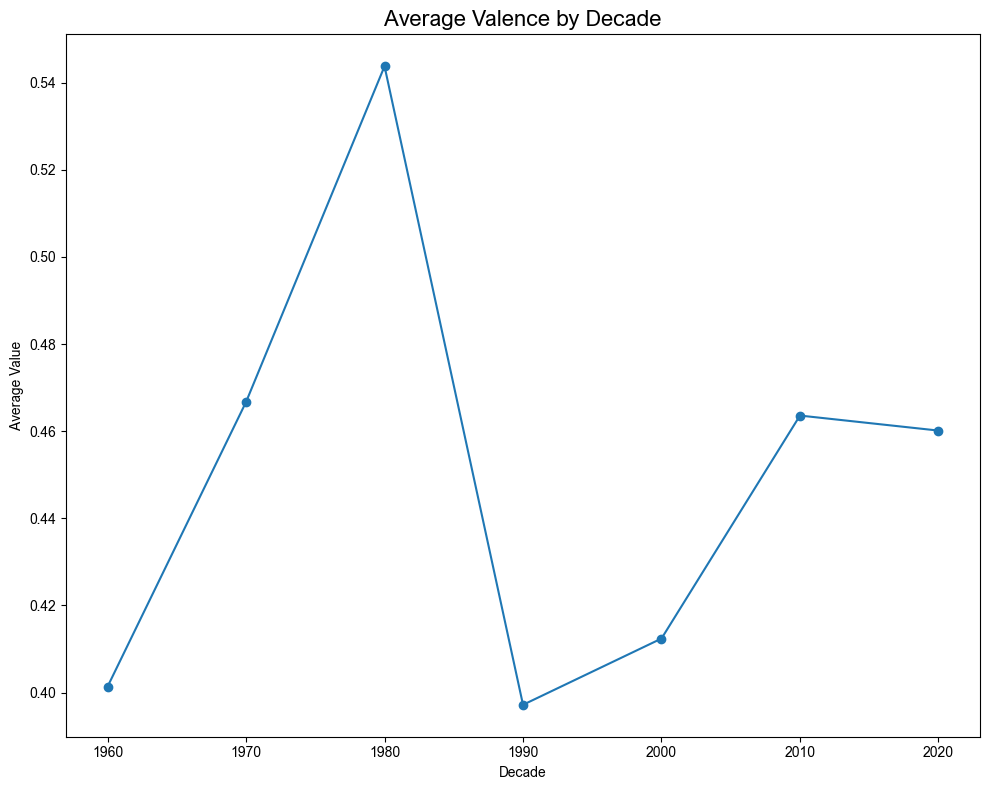

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by decade and calculate the mean of speechiness, instrumentalness, and duration_ms
decade_means = df.groupby('decade').agg({'valence': 'mean'}).reset_index()

# Melt the DataFrame for easier plotting
decade_means_melted = decade_means.melt(id_vars='decade',
                                         value_vars=['valence'],
                                         var_name='metric', value_name='average')

# Create the line plot for speechiness and instrumentalness
plt.figure(figsize=(10, 8))
for metric in ['valence']:
    subset = decade_means_melted[decade_means_melted['metric'] == metric]
    plt.plot(subset['decade'], subset['average'], marker='o', label=metric)

# Customize the first plot
plt.title('Average Valence by Decade', fontproperties=fontprop, fontsize=16)
plt.xlabel('Decade', fontproperties=fontprop)
plt.ylabel('Average Value', fontproperties=fontprop)
plt.xticks(rotation=0, fontproperties=fontprop)
plt.yticks(rotation=0, fontproperties=fontprop)
# plt.legend(title='Metric')

# Show the first plot
plt.tight_layout()
plt.show()

# Form: Repetition and Readability


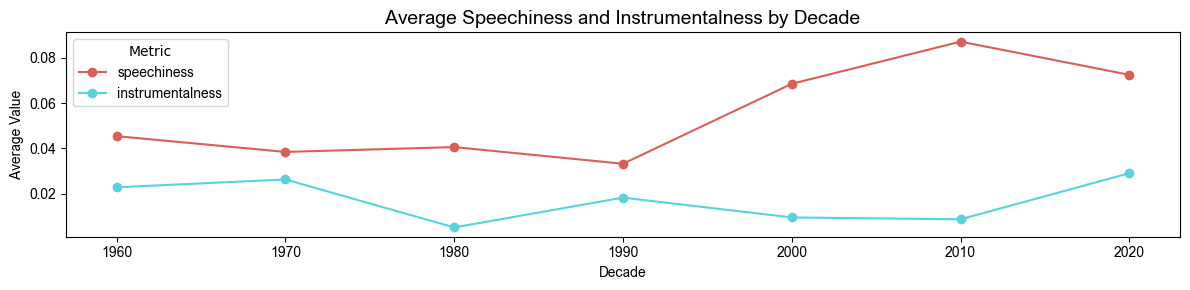

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("hls", 2)

# Group by decade and calculate the mean of speechiness, instrumentalness, and duration_ms
decade_means = df.groupby('decade').agg({'speechiness': 'mean',
                                          'instrumentalness': 'mean',
                                          'duration_ms': 'median',
                                          'danceability': 'mean'}).reset_index()

# Convert duration from milliseconds to minutes
decade_means['duration_minutes'] = decade_means['duration_ms'] / 60000

# Melt the DataFrame for easier plotting
decade_means_melted = decade_means.melt(id_vars='decade',
                                         value_vars=['speechiness', 'instrumentalness', 'duration_minutes', 'danceability'],
                                         var_name='metric', value_name='average')

# Create the line plot for speechiness and instrumentalness
plt.figure(figsize=(12, 3))
for metric in ['speechiness', 'instrumentalness']:
    subset = decade_means_melted[decade_means_melted['metric'] == metric]
    plt.plot(subset['decade'], subset['average'], marker='o', label=metric)

# Customize the first plot
plt.title('Average Speechiness and Instrumentalness by Decade', fontproperties=fontprop, fontsize=14)
plt.xlabel('Decade', fontproperties=fontprop)
plt.ylabel('Average Value', fontproperties=fontprop)
plt.xticks(rotation=0, fontproperties=fontprop)
plt.yticks(rotation=0, fontproperties=fontprop)
plt.legend(title='Metric', prop=fontprop)

# Show the first plot
plt.tight_layout()
plt.show()

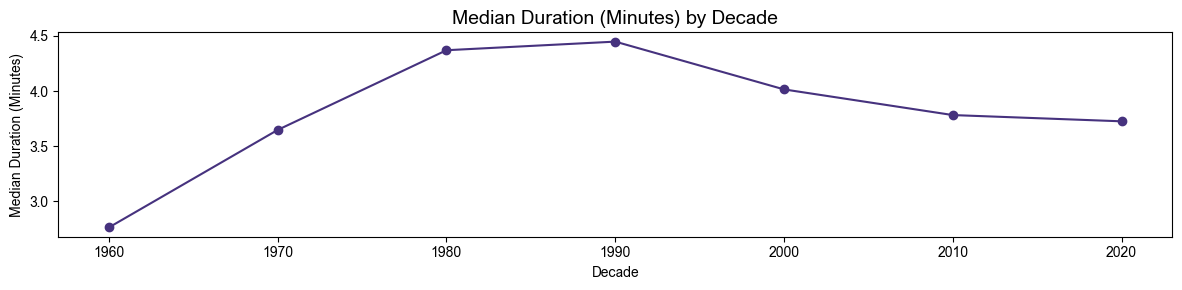

In [31]:
# Create a separate line plot for duration in minutes
plt.figure(figsize=(12, 3))

fontprop = fm.FontProperties(fname='Arial Nova.ttf')
sns.set_palette("viridis")

duration_subset = decade_means_melted[decade_means_melted['metric'] == 'duration_minutes']
plt.plot(duration_subset['decade'], duration_subset['average'], marker='o', label='Duration (minutes)')

# Customize the second plot
plt.title('Median Duration (Minutes) by Decade', fontproperties=fontprop, fontsize=14)
plt.xlabel('Decade', fontproperties=fontprop)
plt.ylabel('Median Duration (Minutes)', fontproperties=fontprop)
plt.xticks(rotation=0, fontproperties=fontprop)
plt.yticks(rotation=0, fontproperties=fontprop)
# plt.legend(title='Metric')

# Show the second plot
plt.tight_layout()
plt.show()

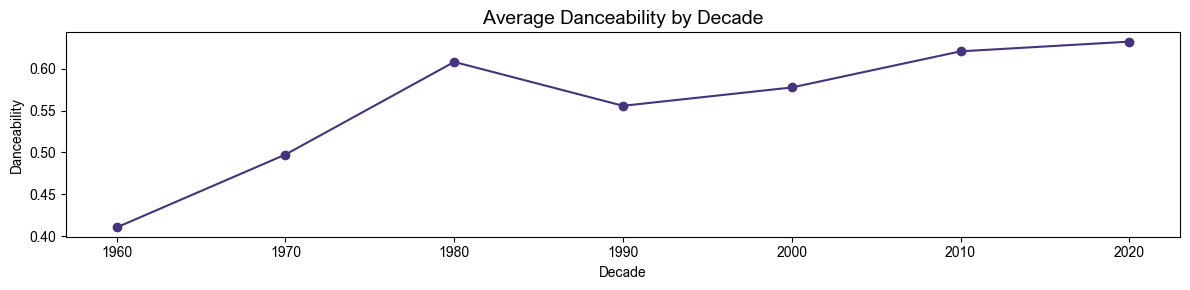

In [32]:
# Create a separate line plot for duration in minutes
plt.figure(figsize=(12, 3))

fontprop = fm.FontProperties(fname='Arial Nova.ttf')
sns.set_palette("viridis")

danceability_subset = decade_means_melted[decade_means_melted['metric'] == 'danceability']
plt.plot(danceability_subset['decade'], danceability_subset['average'], marker='o', label='Danceability')

# Customize the second plot
plt.title('Average Danceability by Decade', fontproperties=fontprop, fontsize=14)
plt.xlabel('Decade', fontproperties=fontprop)
plt.ylabel('Danceability', fontproperties=fontprop)
plt.xticks(rotation=0, fontproperties=fontprop)
plt.yticks(rotation=0, fontproperties=fontprop)
# plt.legend(title='Metric')

# Show the second plot
plt.tight_layout()
plt.show()

In [33]:
!pip install -q textstat language_tool_python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.1 MB/s eta 0:00:00


In [34]:
import textstat
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')

INFO:language_tool_python.download_lt:Unzipping /tmp/tmpafaujwky.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-6.4.zip to /root/.cache/language_tool_python.


In [35]:
def get_repetition_phrase_count(lyrics):
    if pd.isna(lyrics) or lyrics == '':
        return 0

    phrases = [i for i in lyrics.split('\n') if i != '']
    phrase_counts = Counter(phrases)
    return phrase_counts.most_common(1)[0][1] if phrase_counts else 0

def calculate_flesch_reading_ease(lyrics):
    return textstat.flesch_reading_ease(lyrics)

def calculate_dale_chall_readability_score(lyrics):
    return textstat.dale_chall_readability_score(lyrics)

def count_grammar_errors(lyrics):
    return len(tool.check(lyrics))

def count_difficult_words(lyrics):
    return textstat.difficult_words(lyrics)

df['most_common_phrase_count'] = df['lyrics'].apply(get_repetition_phrase_count)
df['flesch_reading_ease'] = df['lyrics'].apply(calculate_flesch_reading_ease)
df['dale_chall_readability_score'] = df['lyrics'].apply(calculate_dale_chall_readability_score)
df['grammar_error_count'] = df['lyrics'].apply(count_grammar_errors)
df['difficult_word_count'] = df['lyrics'].apply(count_difficult_words)

df.head()

,edition,year,status,track,artist,lyrics,danceability,energy,key,loudness,...,duration_ms,time_signature,decade,cleaned_lyrics,sentiment,most_common_phrase_count,flesch_reading_ease,dale_chall_readability_score,grammar_error_count,difficult_word_count
2,3rd,1960,Nominee,Second Time Around,Frank Sinatra,Love is lovelier the second time around\nJust ...,0.253,0.193,0.0,-12.149,...,180467.0,3.0,1960,love lovelier second time around wonderful foo...,positive,2,44.42,7.53,2,4
3,3rd,1960,Nominee,Nice 'n Easy,Frank Sinatra,Let's take it nice and easy\nIt's gonna be so ...,0.536,0.148,0.0,-14.903,...,165760.0,4.0,1960,take nice easy gonna easy u fall love hey baby...,negative,3,35.62,8.89,1,6
4,3rd,1960,Nominee,He'll Have To Go,Jim Reeves,Put your sweet lips a little closer to the pho...,0.567,0.168,1.0,-16.451,...,138373.0,3.0,1960,put sweet lip little closer phone pretend toge...,negative,2,75.21,2.51,2,4
5,4th,1961,Winner,Moon River,Henry Mancini,Moon River\nWider than a mile\nI'm crossin' yo...,0.183,0.127,0.0,-20.113,...,190693.0,3.0,1960,moon river wider mile style day old dream make...,positive,2,46.45,9.78,2,6
7,4th,1961,Nominee,Lollipops And Roses,Jack Jones,Tell her you care each time you speak\nMake it...,0.266,0.163,6.0,-14.202,...,246093.0,4.0,1960,tell care time speak make birthday day week br...,positive,2,-32.73,12.01,2,4


<Figure size 1500x300 with 0 Axes>

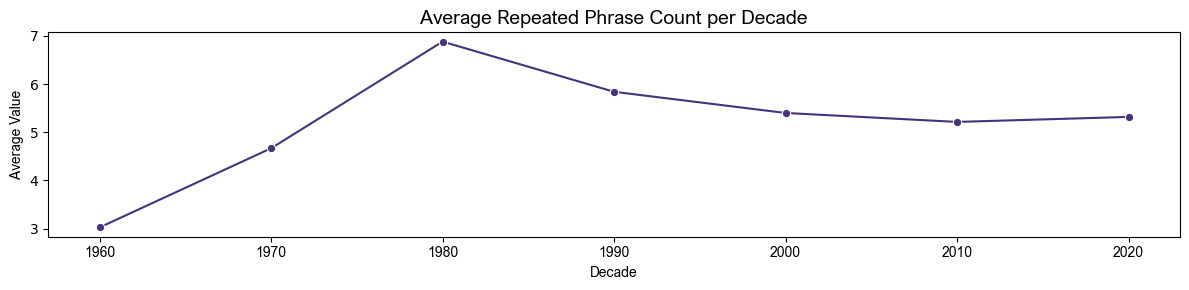

<Figure size 1500x300 with 0 Axes>

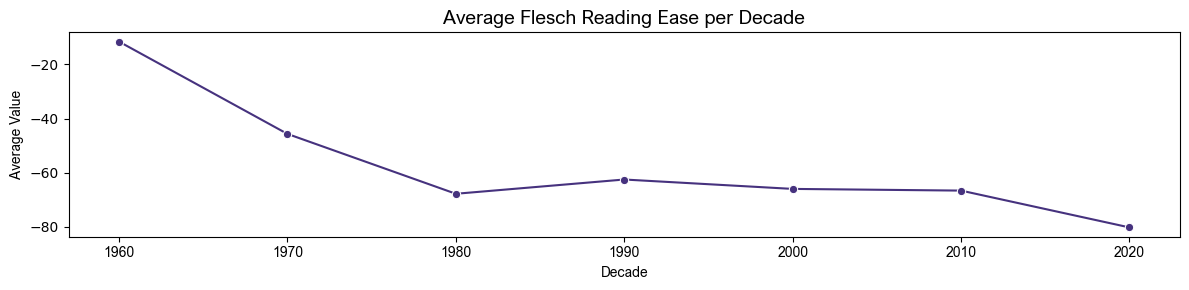

<Figure size 1500x300 with 0 Axes>

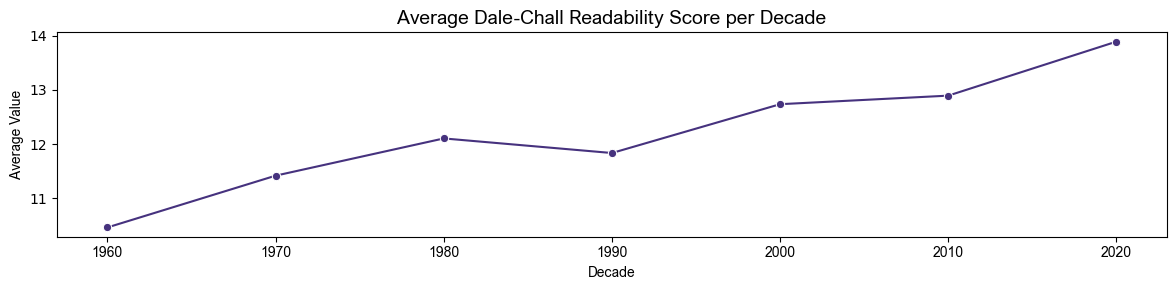

<Figure size 1500x300 with 0 Axes>

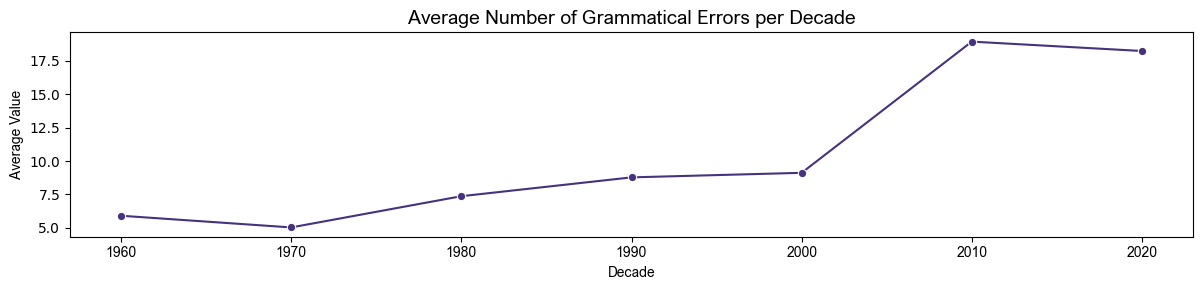

<Figure size 1500x300 with 0 Axes>

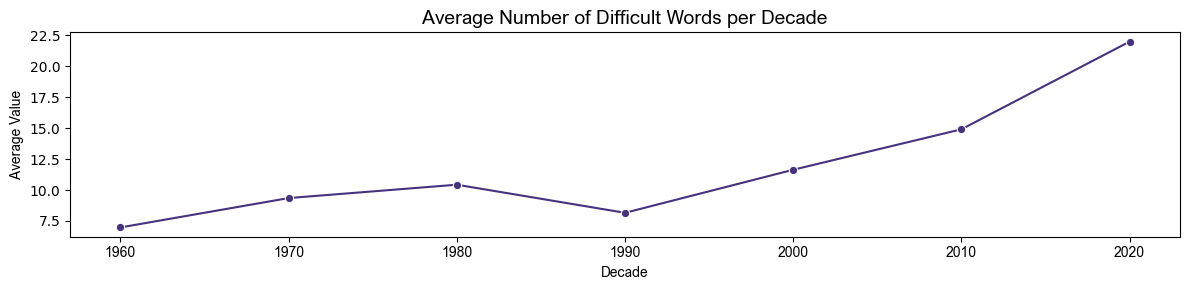

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Group by decade and calculate the average for each metric
decade_averages = df.groupby('decade').agg({
    'most_common_phrase_count': 'mean',
    'flesch_reading_ease': 'mean',
    'dale_chall_readability_score': 'mean',
    'grammar_error_count': 'mean',
    'difficult_word_count': 'mean'
}).reset_index()

# Plotting

titles = {
    'most_common_phrase_count': 'Repeated Phrase Count',
    'flesch_reading_ease': 'Flesch Reading Ease',
    'dale_chall_readability_score': 'Dale-Chall Readability Score',
    'grammar_error_count': 'Number of Grammatical Errors',
    'difficult_word_count': 'Number of Difficult Words'
}

# Line graph for each metric
# Plotting separate graphs for each metric
for column in decade_averages.columns[1:]:  # Skip the 'decade' column
    plt.figure(figsize=(15, 3))
    plt.figure(figsize=(12, 3))
    sns.lineplot(data=decade_averages, marker='o', x='decade', y=column)

    # Customize the plot
    plt.title(f'Average {titles[column]} per Decade', fontproperties=fontprop, fontsize=14)
    plt.xlabel('Decade', fontproperties=fontprop)
    plt.ylabel('Average Value', fontproperties=fontprop)
    plt.xticks(decade_averages['decade'], fontproperties=fontprop)  # Ensure all decades are marked
    plt.yticks(rotation=0)

    # Show
    plt.tight_layout()
    plt.show()